In [5]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as idsp

In [2]:
import os
os.chdir('..')
os.getcwd()

'/home/hina/Documents/Code/SR-Homework2'

In [92]:
a, sr = librosa.load("sample_data/a.wav")
b, sr = librosa.load("sample_data/b.wav")
ban, sr = librosa.load("sample_data/c.wav")
len, sr = librosa.load("sample_data/l.wav")
xuong, sr = librosa.load("sample_data/x.wav")
trai, sr = librosa.load("sample_data/t.wav")
phai, sr = librosa.load("sample_data/p.wav")
nhay, sr = librosa.load("sample_data/n.wav")

sound, sr = librosa.load("sample_data/a-2.wav")

In [93]:
print(sound.shape)

(8357,)


In [94]:
idsp.Audio(data=sound, rate=sr)

/home/hina/Documents/Code/SR-Homework2/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  return f(*args, **kwargs)


Text(0.5, 0, 'Time (s)')

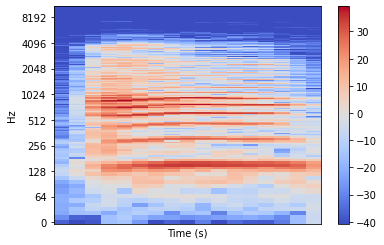

In [95]:
spectrogram = librosa.amplitude_to_db(librosa.stft(sound))
librosa.display.specshow(spectrogram, y_axis="log")
plt.colorbar()
plt.xlabel('Time (s)')

In [96]:
def mfcc_extract(sound):
    mfcc = librosa.feature.mfcc(y=sound, n_mfcc=13, sr=sr)
    delta_mfcc = librosa.feature.delta(mfcc)
    delta2_mfcc = librosa.feature.delta(mfcc, order=2)
    return np.concatenate((mfcc, delta_mfcc, delta2_mfcc))

In [97]:
def dtw_func(mfcc1, mfcc2):
    D, wp = librosa.sequence.dtw(mfcc1, mfcc2, subseq = True, metric='euclidean')
    return D, wp

In [98]:
mfcc1 = mfcc_extract(sound)
mfcc2 = mfcc_extract(a)
D, wp = dtw_func(mfcc1, mfcc2)

In [99]:
D.shape

(16, 17)

In [100]:
whole_sequences_costs = D[-1,:]/wp.shape[0]

In [101]:
whole_sequences_costs2 = whole_sequences_costs + 200
whole_sequences_costs2

array([453.5908494 , 341.93239168, 327.87726435, 332.17594843,
       336.88848294, 339.58202028, 340.75855564, 338.90771459,
       329.96339234, 323.79479513, 320.97295084, 319.26677926,
       318.39317028, 316.16821274, 309.70502504, 294.79244462,
       289.87260932])

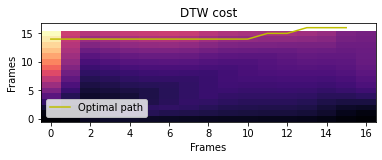

In [102]:
plt.subplot(2, 1, 1)
librosa.display.specshow(D, x_axis='frames', y_axis='frames')
plt.title('DTW cost')
plt.plot(wp[:, 1], wp[:, 0], label='Optimal path', color='y')
plt.legend()
plt.show()

In [103]:
whole_sequences_costs = D[-1,:]/wp.shape[0]
whole_sequences_costs

array([253.5908494 , 141.93239168, 127.87726435, 132.17594843,
       136.88848294, 139.58202028, 140.75855564, 138.90771459,
       129.96339234, 123.79479513, 120.97295084, 119.26677926,
       118.39317028, 116.16821274, 109.70502504,  94.79244462,
        89.87260932])

In [104]:
D[-1, -1]/wp.shape[0]

89.87260931874992